# Digit Recognizer

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

## Get helper functions and import libraries

I've stored some functions helpful for data analysis on GitHub. Credit to Daniel Bourke for many of them, check out his course on Zero to Mastery!

In [ ]:
# Get helper functions
import os.path
!wget https://raw.githubusercontent.com/ryanmalley101/Inara/main/helper_functions.py

--2023-01-06 06:21:52--  https://raw.githubusercontent.com/ryanmalley101/Inara/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4494 (4.4K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   4.39K  --.-KB/s    in 0s      

2023-01-06 06:21:52 (56.3 MB/s) - ‘helper_functions.py.1’ saved [4494/4494]



In [ ]:
from helper_functions import *
from google.colab import files
import tensorflow as tf
import numpy as np
import pandas as pd
import zipfile

## Explore Datasets


Download and Unzip Data

In [ ]:
!pip install -q kaggle

!mkdir ~/.kaggle
!cp /content/drive/MyDrive/datasets/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer


mkdir: cannot create directory ‘/root/.kaggle’: File exists
 85% 13.0M/15.3M [00:01<00:00, 14.6MB/s]
100% 15.3M/15.3M [00:01<00:00, 9.46MB/s]


In [ ]:
# Unzip
unzip_data("/content/digit-recognizer.zip")

Get Data into DataFrames

In [ ]:
train_csv = "/content/train.csv"
test_csv = "/content/test.csv"

# Read the csvs into a dataframe
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)


# Extract the labels from the training dataframe
train_labels_df = train_df["label"]
train_labels_df.head()

# Drop the labels column from the training dataframe
train_df = train_df.drop("label", axis=1)
train_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


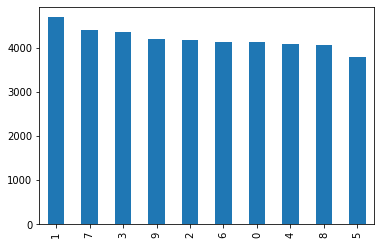

In [ ]:
# Plot number of each class in training set
train_labels_df.value_counts().plot(kind="bar")

Visualizing this is pretty much as possible seems almost impossible. Dataframes aren't going to be helpful here

In [ ]:
# Transform the dataframes to numpy arrays so they can be reshapes
train_np = train_df.to_numpy()
test_np = test_df.to_numpy()
train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Iterate through np array and reshape the 1D arrays to 2D image tensors
train_2d = []
for x in train_np:
  train_2d.append(x.reshape(28, 28))
train_2d[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

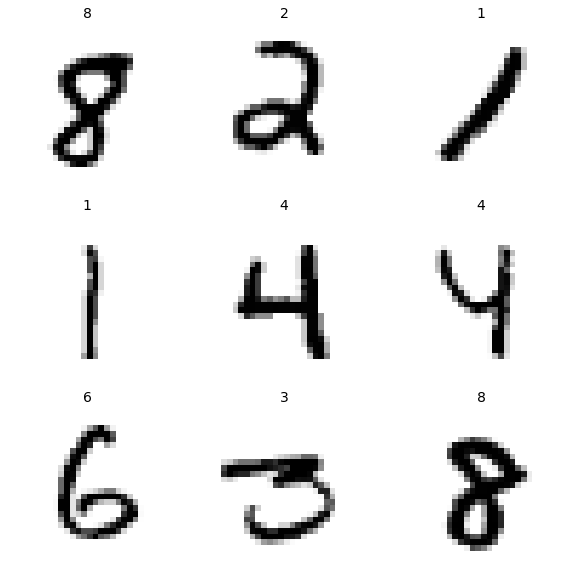

In [ ]:
show_nine_images(train_2d, train_labels_df)

Reshape train and test sets into 3 dimension images


In [ ]:
# Normalize
train_df = train_df / 255.0
test_df = test_df / 255.0

In [ ]:
# Reshape into image
train_df_reshaped = train_df.values.reshape(-1,28,28,1)
test_df_reshaped = test_df.values.reshape(-1,28,28,1)

### Create train and val splits directly from the pandas dataframes (to preserve one dimensional data)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_df_reshaped, train_labels_df.to_numpy(), test_size=0.2, random_state=42)
# x_train = tf.expand_dims(x_train, axis=-1)
# x_val = tf.expand_dims(x_val, axis=-1)
len(x_train), len(y_train), len(x_val), len(y_val)

(33600, 33600, 8400, 8400)

In [ ]:
pd.DataFrame(y_train)[0]

0        6
1        5
2        3
3        4
4        7
        ..
33595    9
33596    9
33597    2
33598    6
33599    0
Name: 0, Length: 33600, dtype: int64

In [ ]:
# One-Hot Encode Labels
y_train_one_hot = pd.get_dummies(pd.DataFrame(y_train)[0]).to_numpy()
y_val_one_hot = pd.get_dummies(pd.DataFrame(y_val)[0]).to_numpy()

In [ ]:
# Turn numpy arrays into tensorflow Datasets
train_ds_unoptimized = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot))
val_ds_unoptimized = tf.data.Dataset.from_tensor_slices((x_val, y_val_one_hot))
train_ds = train_ds_unoptimized.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds_unoptimized.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(32, 28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(32, 10), dtype=tf.uint8, name=None))>

### Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## Start modelling experiments

1. Baseline (SVC Classifier as per https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
2. Simple Dense Model (Two hidden layers, 10 neurons each)

### 1. Baseline SVC Classifier
Multiclass in this case with a "one-versus-one" approach

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
# Create SVC Classifier

model_0 = GaussianNB()
model_0.fit(tf.squeeze(tf.reshape(x_train, shape=(int(42000*.8), 1, 784))), y_train)

GaussianNB()

In [ ]:
len(x_val)

8400

In [ ]:
# How accurate is the SVC Classifier
model_0_results = model_0.score(tf.squeeze(tf.reshape(x_val, shape=(int(8400), 1, 784))), y_val)
print(f"Baseline Accuracy: {model_0_results*100:.2f}%")

Baseline Accuracy: 56.58%


## 2. Simple Dense Model

We'll make a very basic Dense model with a normalization layer to get values from 0-255 to 0-1

In [ ]:
from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  layers.Flatten(),
  layers.Dense(10, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_ds,
            # batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)])

Epoch 1/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.7120 - accuracy: 0.7894 - val_loss: 0.3794 - val_accuracy: 0.8927
Epoch 2/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3281 - accuracy: 0.9046 - val_loss: 0.3234 - val_accuracy: 0.9090
Epoch 3/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2882 - accuracy: 0.9162 - val_loss: 0.3035 - val_accuracy: 0.9138
Epoch 4/100
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2671 - accuracy: 0.9222 - val_loss: 0.2914 - val_accuracy: 0.9167
Epoch 5/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2525 - accuracy: 0.9264 - val_loss: 0.2828 - val_accuracy: 0.9198
Epoch 6/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2410 - accuracy: 0.9295 - val_loss: 0.2774 - val_accuracy: 0.9207
Epoch 7/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2318 - accuracy: 0.9320 - val_loss: 0.2734 - val_ac

In [ ]:
model_1_results = model_1.evaluate(val_ds)
model_1_results

262/262 [==============================] - 1s 2ms/step - loss: 0.2563 - accuracy: 0.9272


[0.25629669427871704, 0.9272423386573792]

## Model 3 : More Complex Dense Model
We'll add two more Dense layers to model 2 and increase the number of neurons to 16 per

In [ ]:
from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  layers.Flatten(),
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(train_ds,
            batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)])

Epoch 1/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.6053 - accuracy: 0.8125 - val_loss: 0.3064 - val_accuracy: 0.9115
Epoch 2/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2680 - accuracy: 0.9215 - val_loss: 0.2513 - val_accuracy: 0.9270
Epoch 3/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2149 - accuracy: 0.9359 - val_loss: 0.2254 - val_accuracy: 0.9344
Epoch 4/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1834 - accuracy: 0.9452 - val_loss: 0.2072 - val_accuracy: 0.9402
Epoch 5/100
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1624 - accuracy: 0.9529 - val_loss: 0.1944 - val_accuracy: 0.9435
Epoch 6/100
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1472 - accuracy: 0.9560 - val_loss: 0.1893 - val_accuracy: 0.9448
Epoch 7/100
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1353 - accuracy: 0.9604 - val_loss: 0.1877 - val_ac

In [ ]:
model_2_results = model_2.evaluate(val_ds)
model_2_results

262/262 [==============================] - 1s 2ms/step - loss: 0.1855 - accuracy: 0.9470


[0.18553291261196136, 0.9470419883728027]

In [ ]:
train_ds.take(1)

## Model 4 - CNN

Create a model with convolutional layers

In [ ]:
from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  layers.Conv2D(filters=8, kernel_size=3, activation="relu", name="conv_1"),
  layers.Conv2D(filters=8, kernel_size=3, activation="relu", name="conv_2"),
  layers.Flatten(),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(train_ds,
            # batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)])

Epoch 1/100
1050/1050 [==============================] - 10s 3ms/step - loss: 0.2646 - accuracy: 0.9231 - val_loss: 0.1198 - val_accuracy: 0.9643
Epoch 2/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0899 - accuracy: 0.9737 - val_loss: 0.1002 - val_accuracy: 0.9686
Epoch 3/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0645 - accuracy: 0.9810 - val_loss: 0.0978 - val_accuracy: 0.9702
Epoch 4/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0499 - accuracy: 0.9854 - val_loss: 0.0971 - val_accuracy: 0.9714
Epoch 5/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0390 - accuracy: 0.9887 - val_loss: 0.0932 - val_accuracy: 0.9741
Epoch 6/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0861 - val_accuracy: 0.9777
Epoch 7/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0913 - val_a

In [ ]:
model_3_results = model_3.evaluate(val_ds)
model_3_results

262/262 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9777


[0.08613207936286926, 0.9776955842971802]

## Model 5 - More complex CNN with Dropout and Max Pooling


In [ ]:

from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(256, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_4.fit(train_ds,
            # batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)])


Epoch 1/100
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4464 - accuracy: 0.8588 - val_loss: 0.1172 - val_accuracy: 0.9667
Epoch 2/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1691 - accuracy: 0.9471 - val_loss: 0.0785 - val_accuracy: 0.9748
Epoch 3/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1273 - accuracy: 0.9602 - val_loss: 0.0676 - val_accuracy: 0.9784
Epoch 4/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1067 - accuracy: 0.9641 - val_loss: 0.0569 - val_accuracy: 0.9828
Epoch 5/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0966 - accuracy: 0.9691 - val_loss: 0.0527 - val_accuracy: 0.9845
Epoch 6/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0859 - accuracy: 0.9722 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 7/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0804 - accuracy: 0.9745 - val_loss: 0.0471 - val_ac

In [ ]:
model_4_results = model_4.evaluate(val_ds)
model_4_results

262/262 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9911


[0.02705557830631733, 0.9910544157028198]

## Model 6 : LSTM

In [ ]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (32, 26, 26, 10)          100       
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 13, 13, 10)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (32, 13, 13, 10)          0         
                                                                 
 conv2d_5 (Conv2D)           (32, 11, 11, 10)          910       
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 5, 5, 10)           0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (32, 5, 5, 10)           

In [ ]:
from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Reshape(target_shape=(784, 1))(inputs)
# layers.Flatten()(inputs)
print(x.shape)
x = layers.LSTM(128, return_sequences=True, name="LSTM_1")(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, name="LSTM_2")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(10, activation="softmax")(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_5.fit(train_ds,
            batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)])


(None, 784, 1)
Epoch 1/100
1050/1050 [==============================] - 133s 73ms/step - loss: 2.3019 - accuracy: 0.1137 - val_loss: 2.3010 - val_accuracy: 0.1083
Epoch 2/100
1050/1050 [==============================] - 74s 71ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1083
Epoch 3/100
1050/1050 [==============================] - 73s 69ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1083
Epoch 4/100
1050/1050 [==============================] - 76s 73ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1083
Epoch 5/100
  57/1050 [>.............................] - ETA: 1:03 - loss: 2.3004 - accuracy: 0.1086

KeyboardInterrupt: ignored

In [ ]:
model_5_results = model_5.evaluate(val_ds)
model_5_results

262/262 [==============================] - 8s 29ms/step - loss: 2.3011 - accuracy: 0.1083


[2.3011300563812256, 0.10830152779817581]

Well that sucked, LSTMs don't seem to be helping much

## Model 7 - Random Forests

This will be my first time creating a random forest model, let's see how it goes. Pulling the structure from: https://www.tensorflow.org/decision_forests/tutorials/beginner_colab

In [ ]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 543.3/588.3 MB 12.0 MB/s eta 0:00:04
ERROR: Operation cancelled by user


In [ ]:
import tensorflow_decision_forests as tfdf

train_ds_categorical = tf.data.Dataset.from_tensor_slices((tf.squeeze(x_train), y_train))
val_ds_categorical = tf.data.Dataset.from_tensor_slices((tf.squeeze(x_val), y_val))
train_ds_large_batch = train_ds_categorical.batch(1000).prefetch(tf.data.AUTOTUNE)
val_ds_large_batch = val_ds_categorical.batch(1000).prefetch(tf.data.AUTOTUNE)


# Specify the model.
model_6 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_6.fit(train_ds_large_batch,
            validation_data = val_ds_large_batch)

ModuleNotFoundError: ignored

I don't know how to fix the evaluation errors in this function. I'll take the output accuracy above at its word, ~96%

In [ ]:
model_6_results = [0.26379, 0.960982]

In [ ]:
## Evaluate model results
results = {"model_1_baseline": model_0_results,
           "model_2_dense_lite": model_1_results,
           "model_3_dense_large": model_2_results,
           "model_4_cnn_lite": model_3_results,
           "model_5_cnn_large": model_4_results,
           "model_6_lstm": model_5_results,
           "model_7_random_forest": model_6_results}

results_df = pd.DataFrame(results).transpose()
acc_df = results_df[1]
acc_df

In [ ]:
acc_df.sort_values(ascending=False).plot(kind="bar", title="Model Accuracy")

So model 5 is our most accurate model, the only one to beat the baseline. Lets try and fine tune it.

## Fine Tuning


### Model 8 - Reduce Dropout

In [ ]:
# Reduce dropout percentages

from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.2),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_7.fit(train_ds,
            # batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1)])


Epoch 1/100
1050/1050 [==============================] - 7s 6ms/step - loss: 0.3744 - accuracy: 0.8832 - val_loss: 0.1044 - val_accuracy: 0.9684 - lr: 0.0010
Epoch 2/100
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1341 - accuracy: 0.9580 - val_loss: 0.0755 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 3/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0992 - accuracy: 0.9682 - val_loss: 0.0617 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 4/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0832 - accuracy: 0.9732 - val_loss: 0.0554 - val_accuracy: 0.9819 - lr: 0.0010
Epoch 5/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0718 - accuracy: 0.9769 - val_loss: 0.0514 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 6/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0608 - accuracy: 0.9800 - val_loss: 0.0447 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 7/100
1050/1050 [=============================

In [ ]:
model_7_results = model_7.evaluate(val_ds)
model_7_results

262/262 [==============================] - 1s 2ms/step - loss: 0.0293 - accuracy: 0.9915


[0.029341470450162888, 0.991531491279602]

### Model 9 - Increase Convolution Units

In [ ]:
# Reduce dropout percentages

from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
  layers.Conv2D(32, 3, activation="relu", batch_input_shape=(32, 28, 28, 1)),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Conv2D(16, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(256, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_8.fit(train_ds,
            # batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1)])


Epoch 1/100
1048/1050 [============================>.] - ETA: 0s - loss: 0.3041 - accuracy: 0.9052

KeyboardInterrupt: ignored

In [ ]:
model_8_results = model_8.evaluate(val_ds)
model_8_results

262/262 [==============================] - 1s 2ms/step - loss: 0.0238 - accuracy: 0.9938


[0.02378423698246479, 0.9937977194786072]

### Model 10 - Change Dense Layers Before Output



In [ ]:
# Reduce dropout percentages

from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(64, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_9.fit(train_ds,
            # batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1)])

Epoch 1/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5371 - accuracy: 0.8317 - val_loss: 0.1715 - val_accuracy: 0.9523 - lr: 0.0010
Epoch 2/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2241 - accuracy: 0.9296 - val_loss: 0.1271 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 3/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1742 - accuracy: 0.9456 - val_loss: 0.1005 - val_accuracy: 0.9679 - lr: 0.0010
Epoch 4/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1435 - accuracy: 0.9546 - val_loss: 0.0811 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 5/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1231 - accuracy: 0.9611 - val_loss: 0.0786 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 6/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1100 - accuracy: 0.9646 - val_loss: 0.0641 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 7/100
1050/1050 [=============================

In [ ]:
model_9_results = model_9.evaluate(val_ds)
model_9_results

262/262 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9911


[0.029368488118052483, 0.9910544157028198]

### Model 11 - Add another Conv layer block


In [ ]:

from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(256, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_10.fit(train_ds,
            # batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1)])


Epoch 1/100
1050/1050 [==============================] - 5s 4ms/step - loss: 1.3857 - accuracy: 0.5106 - val_loss: 0.6926 - val_accuracy: 0.8193 - lr: 0.0010
Epoch 2/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.9371 - accuracy: 0.6778 - val_loss: 0.4928 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 3/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.8286 - accuracy: 0.7208 - val_loss: 0.4466 - val_accuracy: 0.8881 - lr: 0.0010
Epoch 4/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.7601 - accuracy: 0.7449 - val_loss: 0.4237 - val_accuracy: 0.8918 - lr: 0.0010
Epoch 5/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.7186 - accuracy: 0.7604 - val_loss: 0.4218 - val_accuracy: 0.8851 - lr: 0.0010
Epoch 6/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.6865 - accuracy: 0.7739 - val_loss: 0.3730 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 7/100
1050/1050 [=============================

KeyboardInterrupt: ignored

In [ ]:
model_10_results = model_10.evaluate(val_ds)
model_10_results

262/262 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9224


[0.278230220079422, 0.9223520755767822]

### Model 12 - Model 5 with LR callback


In [ ]:
from tensorflow.keras import layers
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(256, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_11.fit(train_ds,
            # batch_size=32,
            # steps_per_epoch = int(len(train_ds)//32),
            epochs=100,
            validation_data=val_ds,
            # validation_steps = int(len(val_ds)//32),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1)])


Epoch 1/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4464 - accuracy: 0.8588 - val_loss: 0.1172 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 2/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1691 - accuracy: 0.9469 - val_loss: 0.0787 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 3/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1270 - accuracy: 0.9601 - val_loss: 0.0678 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 4/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1064 - accuracy: 0.9646 - val_loss: 0.0587 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 5/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0972 - accuracy: 0.9693 - val_loss: 0.0536 - val_accuracy: 0.9834 - lr: 0.0010
Epoch 6/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0858 - accuracy: 0.9725 - val_loss: 0.0500 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 7/100
1050/1050 [=============================

In [ ]:
model_11_results = model_11.evaluate(val_ds)
model_11_results

262/262 [==============================] - 1s 2ms/step - loss: 0.0246 - accuracy: 0.9930


[0.024576721712946892, 0.9929627776145935]

### Plot fine tuning results

In [ ]:
fine_tuning_results = {"model_8_lower_dropout": model_7_results,
                       "model_9_increase_filters": model_8_results,
                       "model_10_lower_dense_output": model_9_results,
                       "model_11_extra_conv_block": model_10_results,
                       "model_5_baseline": model_11_results}
fine_tuning_df = pd.DataFrame(fine_tuning_results).transpose()
fine_tuning_acc = fine_tuning_df[1]
fine_tuning_acc

model_8_lower_dropout          0.991531
model_9_increase_filters       0.993798
model_10_lower_dense_output    0.991054
model_11_extra_conv_block      0.922352
model_5_baseline               0.992963
Name: 1, dtype: float64

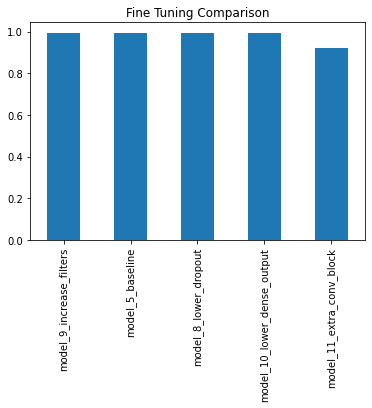

In [ ]:
fine_tuning_acc.sort_values(ascending=False).plot(kind="bar", title="Fine Tuning Comparison")

So the hyperparameters were fine for the most part, just adding another convolutional block increased accuracy just a bit. So we'll go with that model, model 11.

### Construct the final model with tuned hyperparameters

In [ ]:
final_model = tf.keras.models.clone_model(model_8)
final_model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

So we'd expect around a 98.6% accuracy rate on the csv uploaded to Kaggle.

### Fit the augmented dataset

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

In [ ]:
# y_train = pd.get_dummies(train_labels_df).to_numpy()
# y_val.shape

In [ ]:
# y_train = pd.get_dummies(train_labels_df).to_numpy()
train_data = datagen.flow(x_train,  y_train_one_hot, batch_size=32)
final_model.fit(train_data,
                epochs = 30, 
                validation_data = (x_val, y_val_one_hot),
                verbose = 2, 
                steps_per_epoch=x_train.shape[0] // 32,
                callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001),
                          #  tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
                          ])

Epoch 1/30
1050/1050 - 12s - loss: 0.5412 - accuracy: 0.8235 - val_loss: 0.1001 - val_accuracy: 0.9680 - lr: 0.0010 - 12s/epoch - 11ms/step
Epoch 2/30
1050/1050 - 11s - loss: 0.2108 - accuracy: 0.9338 - val_loss: 0.0678 - val_accuracy: 0.9761 - lr: 0.0010 - 11s/epoch - 11ms/step
Epoch 3/30
1050/1050 - 11s - loss: 0.1544 - accuracy: 0.9509 - val_loss: 0.0560 - val_accuracy: 0.9804 - lr: 0.0010 - 11s/epoch - 11ms/step
Epoch 4/30
1050/1050 - 11s - loss: 0.1385 - accuracy: 0.9574 - val_loss: 0.0523 - val_accuracy: 0.9827 - lr: 0.0010 - 11s/epoch - 10ms/step
Epoch 5/30
1050/1050 - 11s - loss: 0.1183 - accuracy: 0.9642 - val_loss: 0.0394 - val_accuracy: 0.9872 - lr: 0.0010 - 11s/epoch - 11ms/step
Epoch 6/30
1050/1050 - 11s - loss: 0.1107 - accuracy: 0.9645 - val_loss: 0.0338 - val_accuracy: 0.9876 - lr: 0.0010 - 11s/epoch - 11ms/step
Epoch 7/30
1050/1050 - 11s - loss: 0.1072 - accuracy: 0.9665 - val_loss: 0.0337 - val_accuracy: 0.9884 - lr: 0.0010 - 11s/epoch - 10ms/step
Epoch 8/30
1050/1050

## Evaluate Test Dataset

In [ ]:
test_preds = tf.round(final_model.predict(test_df_reshaped))
test_preds

875/875 [==============================] - 2s 2ms/step


<tf.Tensor: shape=(28000, 10), dtype=float32, numpy=
array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
test_preds_labels = tf.argmax(test_preds, axis=1)
# test_preds_labels_df = pd.DataFrame(test_preds_labels)
# test_preds_labels_df

In [ ]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(len(np.arange(1, 28001)), len(test_preds_labels))
numpy_predicts = {"ImageId": np.arange(1, 28001), "Label":test_preds_labels}
predict_df = pd.DataFrame(numpy_predicts)
predict_df.to_csv("prediction_1.csv", index=False)

28000 28000
